<a href="https://colab.research.google.com/github/rodimendes/rest-analysis/blob/main/vendas2018_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação de bibliotecas e pastas - EXECUTAR

In [13]:
import pandas as pd
import os
import pathlib
import sqlite3
import datetime as dt
import seaborn as sns

### Sandra

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Rodrigo

In [14]:
from google.colab import drive
drive.mount('/ShardDrives/')

Drive already mounted at /ShardDrives/; to attempt to forcibly remount, call drive.mount("/ShardDrives/", force_remount=True).


## Formatando valores para todos o Dataframe - EXECUTAR

In [15]:
pd.set_option('float_format', '{:,.2f}'.format)

## Renomeando arquivos 
**Desnecessário para estes arquivos** 

Executado e nomes alterados

In [ ]:
"""folder = "/ShardDrives/MyDrive/rest_data_extraction /volume_vendas_produto/"
for file in os.listdir(folder):
    old_name = folder + file
    data = pd.read_excel(old_name)
    if file[:7] != 'vendas_':
      report_date = data['Unnamed: 1'][1][-10:]
      new_name = f"{folder}vendas_{report_date}.xlsx"
      os.rename(old_name, new_name)"""

'folder = "/ShardDrives/MyDrive/rest_data_extraction /volume_vendas_produto/"\nfor file in os.listdir(folder):\n    old_name = folder + file\n    data = pd.read_excel(old_name)\n    if file[:7] != \'vendas_\':\n      report_date = data[\'Unnamed: 1\'][1][-10:]\n      new_name = f"{folder}vendas_{report_date}.xlsx"\n      os.rename(old_name, new_name)'

## Data opening

### Sandra

In [ ]:
file = "/content/drive/MyDrive/rest_data_extraction /base_de_dados/volume_vendas_2018_2022.xlsx"
data = pd.read_excel(file)

### Rodrigo

In [ ]:
file = "/ShardDrives/MyDrive/rest_data_extraction /base_de_dados/volume_vendas_2018_2022.xlsx"
data = pd.read_excel(file)

## Visão geral do dataframe

In [ ]:
data.head(10)

,Evolução de Vendas por Produto,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Séries: Todas,Data de Início: 01-01-2018,Data de Fim: 25-08-2022,NaN,NaN,NaN,NaN
5,Familia: Todas,Sub-Familia: Todas,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Data,Código,Produto,Familia / Sub-Familia,Quantidade,Valor Total S/IVA,Valor Total
8,2018-01-03 00:00:00,"100,002.00",Avenida,Bebidas / Cerveja,4.00,13.90,17.10
9,2018-01-03 00:00:00,"100,003.00",Batata Doce,Comida / Evento,9.00,41.42,46.80


## Limpeza inicial

In [ ]:
# Limpar linhas vazias e reiniciar o index

df = data.rename(columns=data.iloc[7]).iloc[8:-1].reset_index(drop=True)
df

,Data,Código,Produto,Familia / Sub-Familia,Quantidade,Valor Total S/IVA,Valor Total
0,2018-01-03 00:00:00,"100,002.00",Avenida,Bebidas / Cerveja,4.00,13.90,17.10
1,2018-01-03 00:00:00,"100,003.00",Batata Doce,Comida / Evento,9.00,41.42,46.80
2,2018-01-03 00:00:00,"100,005.00",Berbigão,Comida / Pratos,9.00,42.83,48.40
3,2018-01-03 00:00:00,"100,012.00",Cp Dashi,Bebidas / Soft Drinks,1.00,3.10,3.50
4,2018-01-03 00:00:00,"100,022.00",Cp Phaunus Pet Nat,Bebidas / Espumantes,2.00,13.01,16.00
...,...,...,...,...,...,...,...
68219,2022-08-24 00:00:00,"101,431.00",Alheta Pescada,Comida / Especiais,4.00,60.18,68.00
68220,2022-08-24 00:00:00,"101,432.00",Leite Frito,Comida / Sobremesas,6.00,47.79,54.00
68221,2022-08-24 00:00:00,"101,450.00",Extra Tosta,Comida / Snacks,1.00,3.54,4.00
68222,2022-08-24 00:00:00,"101,454.00",Cereja,Comida / Sobremesas,1.00,6.64,7.50


In [ ]:
# Separando coluna Famila / Sub-Familia em duas

new_column = df['Familia / Sub-Familia'].str.split('/', n=1, expand=True)
df['familia'] = new_column[0]
df['sub_familia'] = new_column[1]

In [ ]:
# Renomeando colunas

df = df[['Data', 'Código', 'Produto', 'familia', 'sub_familia', 'Quantidade', 'Valor Total S/IVA', 'Valor Total']]
df.columns = ['data', 'codigo', 'produto', 'familia', 'sub_familia', 'quantidade', 'total_s_iva', 'total']

### Tratamento de colunas


In [ ]:
# Definindo o tipo adequado para as colunas

df.info()

In [ ]:
df.data = pd.to_datetime(df.data)
df['codigo'] = pd.to_numeric(df['codigo'])
df['quantidade'] = pd.to_numeric(df['quantidade'])
df['total_s_iva'] = pd.to_numeric(df['total_s_iva'])
df['total'] = pd.to_numeric(df['total'])
df.info()

In [ ]:
df.columns

Index(['data', 'codigo', 'produto', 'familia', 'sub_familia', 'quantidade',
       'total_s_iva', 'total'],
      dtype='object')

## Rodrigo - EXECUTAR PARA COMEÇAR A ANÁLISE

In [20]:
df_vendas = '/ShardDrives/MyDrive/rest_data_extraction /base_de_dados/df_vendas.pkl'
df_vendas = pd.read_pickle(df_vendas)

pandas.core.frame.DataFrame

## Sandra - EXECUTAR PARA COMEÇAR A ANÁLISE

In [ ]:
df_vendas = '/content/drive/MyDrive/rest_data_extraction /base_de_dados/df_vendas.pkl'
df_vendas = pd.read_pickle(df_vendas)

## Criação do Banco de Dados
**Etapa desnecessária para este caso de já termos o dataset completo e não ser necessário atualizar com novos dados**


In [ ]:
#bd = sqlite3.connect("vendas_restaurantes.db")

In [ ]:
#cursor = bd.cursor()

### A célula abaixo só é necessário executar na primeira vez, para a criação da tabela no banco de dados

In [ ]:
#cursor.execute("CREATE TABLE 'Vendas Restauração 2018_2022' (data INTEGER, codigo INT, produto TEXT, familia TEXT, sub_familia TEXT, quantidade INT, total_s_iva REAL, total REAL)")

In [ ]:
#df.head(2)

In [ ]:
#for index, row in df.iterrows():
#    data = row[0]
#    codigo = row[1]
#    produto = row[2]
#    familia = row[3]
#    sub_familia = row[4]
#    quantidade = row[5]
#    total_s_iva = row[6]
#    total = row[7]
#    cursor.execute('''INSERT INTO 'Vendas Restauração 2018_2022' \
#                    (data, codigo, produto, familia, sub_familia, quantidade, total_s_iva, total) VALUES (?,?,?,?,?,?,?,?)''', \
#                    (str(data), codigo, produto, familia, sub_familia, quantidade, total_s_iva, total))
#    
#    bd.commit()

##**Primeiras explorações**

In [21]:
# Faturamento total do período

faturamento_total = df_vendas.total.sum()
f'A empresa faturou {faturamento_total:,.2f} de euros durante o período'

'A empresa faturou 4,603,194.17 de euros durante o período'

In [22]:
# Faturamento por família

faturamento_familia = df_vendas[['familia', 'total']].groupby(by='familia').sum()
faturamento_familia.sort_values(by='total', ascending=False)

,total
familia,
Comida,"3,058,871.40"
Bebidas,"1,464,298.98"
Outros,"79,387.59"
Talho,370.00
Sem Familia Definida,226.00
Peixaria,20.70
Mercearia,19.50


###Rentabilidade diária

In [24]:
dt.date.isoweekday(df_vendas.data[0])

3

In [25]:
# Criando uma lista com todos os dias de venda e atribuindo a uma nova coluna

dia_semana = []
for dia in df_vendas.data:
  dia_semana.append(dt.date.isoweekday(dia))

df_vendas['dia_semana'] = dia_semana
df_vendas.head(2)

,data,codigo,produto,familia,sub_familia,quantidade,total_s_iva,total,dia_semana
0,2018-01-03,"100,002.00",Avenida,Bebidas,Cerveja,4.00,13.90,17.10,3
1,2018-01-03,"100,003.00",Batata Doce,Comida,Evento,9.00,41.42,46.80,3


In [26]:
rentabilidade_diaria = df_vendas[['quantidade','total', 'dia_semana']].groupby(by='dia_semana').sum()
rentabilidade_diaria

,quantidade,total
dia_semana,,
1,"2,342.00","31,823.80"
2,"4,147.00","47,654.04"
3,"92,440.01","744,466.71"
4,"104,169.00","888,494.16"
5,"130,162.00","1,082,017.64"
6,"132,789.00","1,089,471.37"
7,"90,730.00","719,266.45"


In [27]:
# Rentabilidade diária, em ordem decrescente, para o período.

rentabilidade_diaria.sort_values(by='total', ascending=False)

,quantidade,total
dia_semana,,
6,"132,789.00","1,089,471.37"
5,"130,162.00","1,082,017.64"
4,"104,169.00","888,494.16"
3,"92,440.01","744,466.71"
7,"90,730.00","719,266.45"
2,"4,147.00","47,654.04"
1,"2,342.00","31,823.80"


In [28]:
# Dia da semana possui mais entradas, ou seja, mais linhas.

df_vendas.dia_semana.value_counts()

5    14997
6    14638
4    13709
3    12233
7    11525
2      696
1      426
Name: dia_semana, dtype: int64

In [29]:
## Por que as segundas e possuem valores muito baixos?
## Quais os dias e horários de funcionamento do restaurante?

In [30]:
df_vendas[df_vendas['dia_semana'] == 1]

,data,codigo,produto,familia,sub_familia,quantidade,total_s_iva,total,dia_semana
1375,2018-02-05,"100,131.00",Menu Grupo,Outros,,29.00,513.27,580.00,1
3218,2018-04-02,"100,317.00",Aluguer Espaço,Outros,,1.00,"1,500.00","1,845.00",1
3219,2018-04-02,"100,318.00",Jantar grupo privado,Outros,,40.00,"1,951.22","2,400.00",1
3220,2018-04-02,"100,319.00",Extra,Outros,,1.00,24.39,30.00,1
11200,2018-09-24,2.00,Porco Panado,Comida,Snacks,59.00,215.04,264.50,1
...,...,...,...,...,...,...,...,...,...
56992,2021-12-27,"101,406.00",G Wave,Bebidas,G Branco PT,1.00,32.52,40.00,1
56993,2021-12-27,"101,412.00",G Humus Curtimenta,Bebidas,G Branco PT,1.00,22.76,28.00,1
56994,2021-12-27,"101,413.00",Cp Sol Passito,Bebidas,Copo Outros,1.00,11.38,14.00,1
56995,2021-12-27,"101,418.00",G Capucha Cedro Alvarao,Bebidas,G Branco PT,1.00,40.65,50.00,1


##**Regressão Linear - Faturamento futuro**##

In [31]:
# Bibliotecas para construção do modelo

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [32]:
object_df = df_vendas.select_dtypes(include=['object']).copy()

In [33]:
object_df

,produto,familia,sub_familia
0,Avenida,Bebidas,Cerveja
1,Batata Doce,Comida,Evento
2,Berbigão,Comida,Pratos
3,Cp Dashi,Bebidas,Soft Drinks
4,Cp Phaunus Pet Nat,Bebidas,Espumantes
...,...,...,...
68219,Alheta Pescada,Comida,Especiais
68220,Leite Frito,Comida,Sobremesas
68221,Extra Tosta,Comida,Snacks
68222,Cereja,Comida,Sobremesas


In [34]:
anos = []
for dia in df_vendas['data']:
  year = dia.year
  anos.append(year)

print(len(anos))

68224


In [35]:
df_vendas['ano'] = anos

In [36]:
# Célula teste

df_vendas.sample()

,data,codigo,produto,familia,sub_familia,quantidade,total_s_iva,total,dia_semana,ano
17333,2019-02-03,"100,005.00",Berbigão,Comida,Pratos,7.00,37.17,42.00,7,2019


In [37]:
# Agrupar por anos e analisar ano a ano

df_2018 = df_vendas[df_vendas['ano'] == 2018]
df_2019 = df_vendas[df_vendas['ano'] == 2019]
df_2020 = df_vendas[df_vendas['ano'] == 2020]
df_2021 = df_vendas[df_vendas['ano'] == 2021]
df_2022 = df_vendas[df_vendas['ano'] == 2022]

In [38]:
print(f'Ano 2018 - {df_2018.shape}')
print(f'Ano 2019 - {df_2019.shape}')
print(f'Ano 2020 - {df_2020.shape}')
print(f'Ano 2021 - {df_2021.shape}')
print(f'Ano 2022 - {df_2022.shape}')

Ano 2018 - (15713, 10)
Ano 2019 - (18731, 10)
Ano 2020 - (10630, 10)
Ano 2021 - (12220, 10)
Ano 2022 - (10930, 10)


In [39]:
df_vendas[['quantidade', 'total', 'ano']].groupby(by='ano').sum()

,quantidade,total
ano,,
2018,"128,783.00","970,481.34"
2019,"172,435.00","1,354,907.69"
2020,"69,450.00","561,141.00"
2021,"95,049.01","831,493.13"
2022,"91,062.00","885,171.01"


### Rodrigo - **Regressão Linear para 2018**

Fazer modelo para todos os anos e verificar padrão.

In [40]:
df_2018

,data,codigo,produto,familia,sub_familia,quantidade,total_s_iva,total,dia_semana,ano
0,2018-01-03,"100,002.00",Avenida,Bebidas,Cerveja,4.00,13.90,17.10,3,2018
1,2018-01-03,"100,003.00",Batata Doce,Comida,Evento,9.00,41.42,46.80,3,2018
2,2018-01-03,"100,005.00",Berbigão,Comida,Pratos,9.00,42.83,48.40,3,2018
3,2018-01-03,"100,012.00",Cp Dashi,Bebidas,Soft Drinks,1.00,3.10,3.50,3,2018
4,2018-01-03,"100,022.00",Cp Phaunus Pet Nat,Bebidas,Espumantes,2.00,13.01,16.00,3,2018
...,...,...,...,...,...,...,...,...,...,...
15708,2018-12-31,"100,598.00",Cp Pulso,Bebidas,Copo Tinto,1.00,4.88,6.00,1,2018
15709,2018-12-31,"100,607.00",G Roumanie,Bebidas,G Tinto Int,1.00,45.53,56.00,1,2018
15710,2018-12-31,"100,617.00",Cp Atanasius,Bebidas,Copo Tinto,2.00,16.26,20.00,1,2018
15711,2018-12-31,"100,619.00",Cp Chapel,Bebidas,Copo Tinto,2.00,13.82,17.00,1,2018


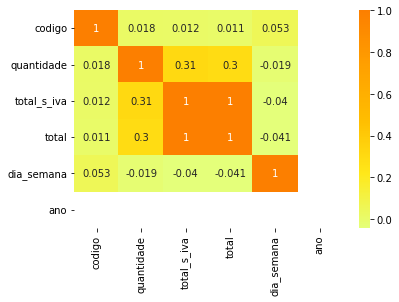

In [41]:
sns.heatmap(df_2018.corr(), cmap='Wistia', annot=True)

In [42]:
df_2018_data_total = df_2018[['data', 'quantidade', 'total', 'dia_semana']].groupby(by='data').sum()

In [43]:
df_2018_data_total

,quantidade,total,dia_semana
data,,,
2018-01-03,207.00,"1,249.02",132
2018-01-04,305.00,"2,627.98",224
2018-01-05,362.00,"2,891.90",275
2018-01-06,528.00,"3,727.40",390
2018-01-07,608.00,"3,457.17",385
...,...,...,...
2018-12-27,752.00,"5,478.27",328
2018-12-28,938.00,"6,493.39",440
2018-12-29,902.00,"6,032.33",486


In [44]:
teste_data_total = df_2018[['data', 'total']]

In [ ]:
# Definindo variáveis
# Simple Linear Regression - one feature, one input

# 1) Data e total

X = np.array(df_2018_data_total.index).reshape(-1, 1)
y = df_2018_data_total['total']

print(X.shape)
print(y.shape)

In [46]:
# Creating a model

linear_regression_model = LinearRegression()

In [47]:
# Training model

linear_regression_model.fit(X, y)

LinearRegression()

In [ ]:
linear_regression_model.coef_

array([7.64592203e-14])

In [ ]:
linear_regression_model.intercept_

-113087.68459138816

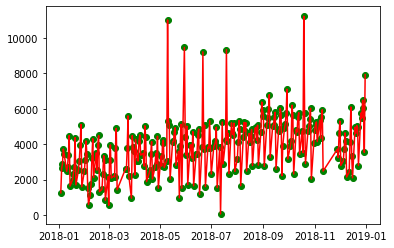

In [ ]:
plt.plot(X, y, color='r')
plt.scatter(X, y, color='g')

plt.show()

In [ ]:
df_2018_data_total[df_2018_data_total['total'] > 10000]

,quantidade,total,dia_semana
data,,,
2018-05-10,487.00,"11,029.44",276
2018-10-19,776.00,"11,238.82",400


In [ ]:
df_2018[df_2018['data'] == '2018-05-10'].tail(50)

,data,codigo,produto,familia,sub_familia,quantidade,total_s_iva,total,dia_semana,ano
4710,2018-05-10,"100,068.00",Houjicha,Bebidas,Cha/Cafe,2.00,6.20,7.00,4,2018
4711,2018-05-10,"100,069.00",Italian Grape Ale,Bebidas,Cerveja,2.00,10.81,13.30,4,2018
4712,2018-05-10,"100,070.00",Kamairicha,Bebidas,Cha/Cafe,1.00,3.54,4.00,4,2018
4713,2018-05-10,"100,071.00",Kombucha,Bebidas,Soft Drinks,5.00,11.71,14.40,4,2018
4714,2018-05-10,"100,075.00",Nikka Blended,Bebidas,Cocktails/ Spirits,2.00,14.63,18.00,4,2018
4715,2018-05-10,"100,077.00",Pao e Manteigas,Comida,Snacks,30.00,106.30,120.12,4,2018
4716,2018-05-10,"100,080.00",Prado Collins,Bebidas,Cocktails/ Spirits,5.00,31.87,39.20,4,2018
4717,2018-05-10,"100,081.00",Tártaro,Comida,Snacks,21.00,119.07,134.55,4,2018
4718,2018-05-10,"100,082.00",Tosta de Toucinho,Comida,Pratos,7.00,27.88,31.50,4,2018
4719,2018-05-10,"100,087.00",Espresso,Bebidas,Cha/Cafe,30.00,33.48,37.83,4,2018


In [ ]:
# Analisar anos com e sem 'OUTROS' na coluna família.

## Comandos GITHUB

In [ ]:
# Fazer o git funcionar para o trabalho
"""
Para abrir:
  Clicar ARQUIVO >> ABRIR NOTEBOOK
  Selecionar a aba GITHUB e localizar o repositório 'rodimendes/rest-analysis', o branch MAIN e clicar no arquivo 'vendas2018_2022.ipynb'
Ao sair:
  Clicar ARQUIVO >> SALVAR UMA CÓPIA NO GITHUB
  Na janela que se abrirá, conferir repositório, branch e clicar em OK
"""

In [ ]:
# Agrupar por mês e analisar mês a mês (??)
# Agrupar por dia e analisar o dia a dia
# Fazer RL e identificar o comportamento da sazonalidade e a "outra"
# Fazer Time Series e comparar modelos
# meses = []
